In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# getting the dataset ready

In [3]:
creditcard='/kaggle/input/creditcardfraud/creditcard.csv'

In [4]:
df=pd.read_csv(creditcard)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [6]:
print('shape of the dataframe',df.shape)
print('print no.of classes',df['Class'].unique())
print('No.of records with class 0',(df['Class']==0).sum())
print('No. of records with class1',(df['Class']==1).sum())

shape of the dataframe (284807, 31)
print no.of classes [0 1]
No.of records with class 0 284315
No. of records with class1 492


<Axes: xlabel='Class', ylabel='count'>

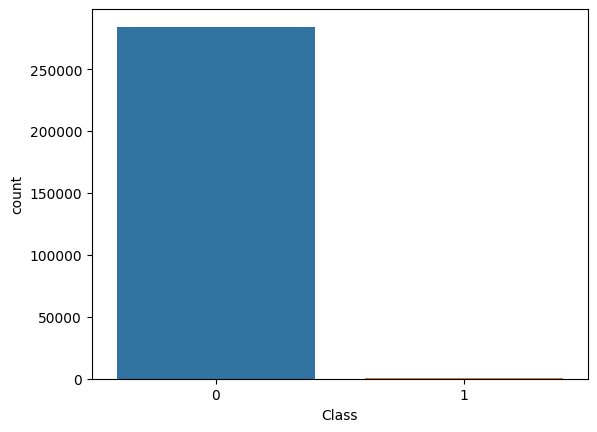

In [7]:
sns.countplot(data=df,x='Class')

In [8]:
cor=df.corr()['Class'][:30]
print(cor)

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64


<Axes: title={'center': 'Correlation of features with the target variable'}>

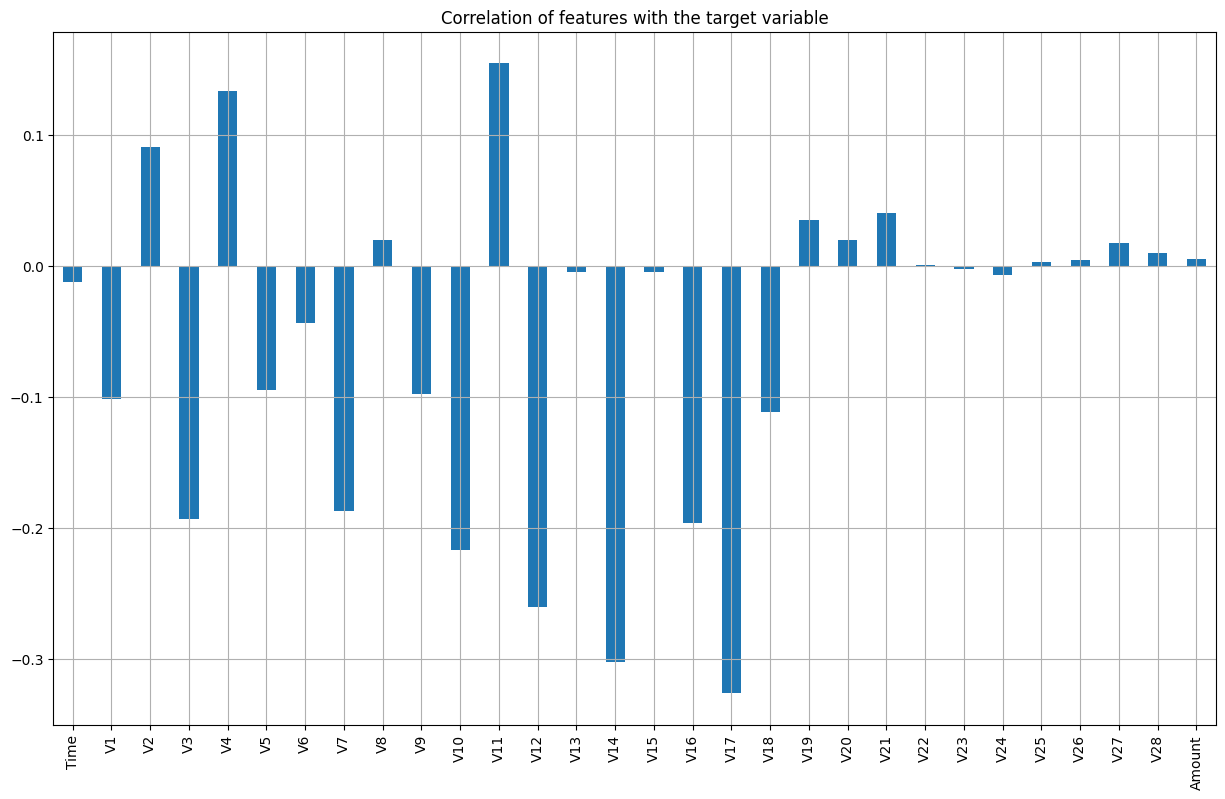

In [9]:
cor.plot.bar(figsize=(15,9),title='Correlation of features with the target variable',grid=True)

<Axes: >

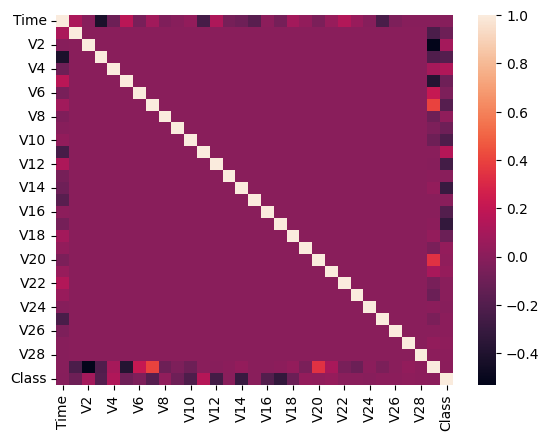

In [10]:
sns.heatmap(df.corr())

In [11]:
y=df.corr()['Class']
df2=df.copy()
for i in df.columns:
    if abs(y[i])<0.13:
        df2.drop(columns=[i],inplace=True)

In [12]:
df2.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


<Axes: >

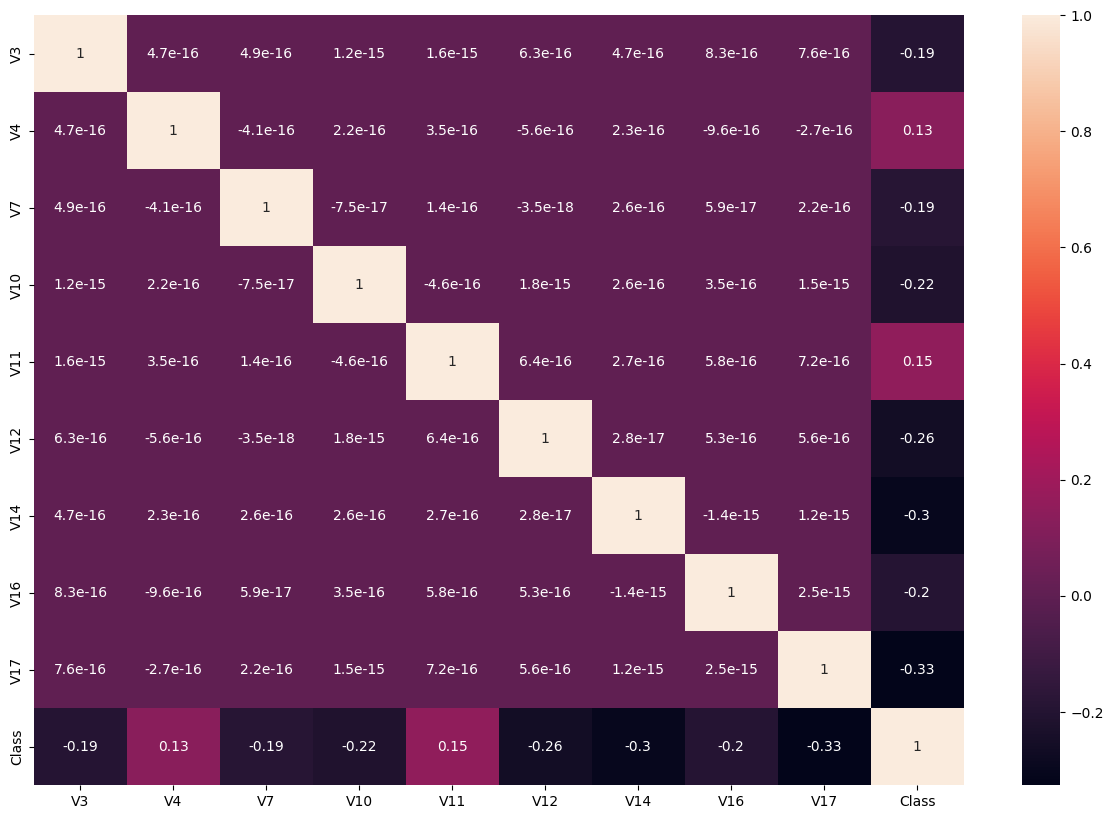

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

<Axes: title={'center': 'Correlation of features with the target variable'}>

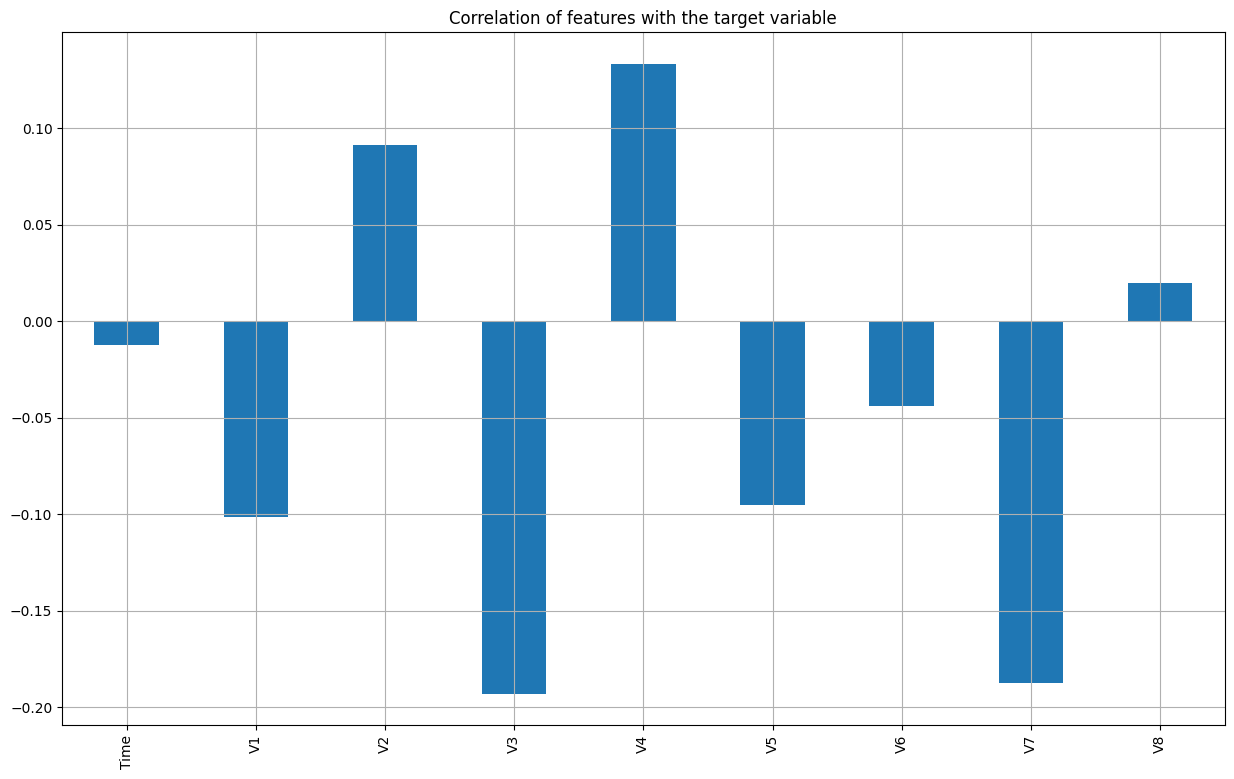

In [14]:
cor=df.corr()['Class'][:9]
cor.plot.bar(figsize=(15,9),title='Correlation of features with the target variable',grid=True)

In [15]:
from imblearn.under_sampling import RandomUnderSampler
X=df2.drop('Class',axis=1)
y=df2['Class']
rus=RandomUnderSampler(random_state=42)
x_resampled,y_resampled=rus.fit_resample(X,y)
downsampled_df = pd.concat([pd.DataFrame(x_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)
downsampled_df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
138028,-0.666593,0.716564,0.388881,-0.597739,-0.325347,-0.216435,-1.054631,0.601226,0.631117,0
63099,0.904547,0.694584,0.495236,0.170547,0.821998,0.468322,0.573006,-0.011633,-0.504570,0
73411,1.122074,-1.308725,-0.701304,2.051312,0.575866,-0.594037,-0.338340,-0.756390,0.535141,0
164247,-0.987421,-0.029567,0.775644,-1.238598,-0.841133,-0.586472,-0.436671,0.266437,0.703234,0
148999,0.269272,3.866438,-0.721945,1.166335,1.297531,-1.920966,1.323225,1.317655,-0.441076,0


In [16]:
downsampled_df.shape

(984, 10)

<Axes: xlabel='Class', ylabel='count'>

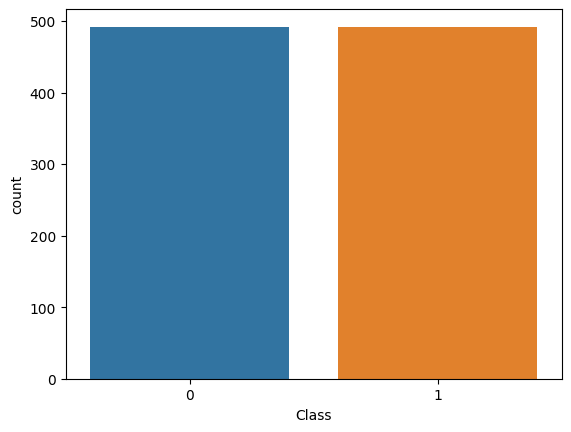

In [17]:
sns.countplot(x='Class', data=downsampled_df)

In [ ]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
sns.pairplot(downsampled_df, hue='Class')

In [19]:
pip install lazypredict


Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
x = downsampled_df.drop(columns= 'Class')
y = downsampled_df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 16.51it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500635 -> initscore=0.002541
[LightGBM] [Info] Start training from score 0.002541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.94,0.94,0.94,0.94,0.17
LabelPropagation,0.94,0.94,0.94,0.94,0.13
XGBClassifier,0.93,0.93,0.93,0.93,0.12
LGBMClassifier,0.93,0.93,0.93,0.93,0.14
ExtraTreesClassifier,0.93,0.93,0.93,0.93,0.18
BaggingClassifier,0.93,0.93,0.93,0.93,0.07
RandomForestClassifier,0.92,0.92,0.92,0.92,0.29
Perceptron,0.92,0.92,0.92,0.92,0.01
KNeighborsClassifier,0.92,0.92,0.92,0.92,0.03


In [21]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
X = downsampled_df.drop('Class', axis=1)
y = downsampled_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LabelSpreading()
param_grid = {
    'kernel': ['knn', 'rbf'], 
    'gamma': ['scale', 'auto', 0.1, 1.0],  
    'alpha': [0.1, 0.2, 0.5, 0.8], 
    'n_neighbors': [3, 5, 7] 
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.2f}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'alpha': 0.1, 'gamma': 0.1, 'kernel': 'knn', 'n_neighbors': 3}
Best Cross-validation Accuracy: 0.95

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = downsampled_df.drop(columns='Class')
y = downsampled_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

label_spreading = LabelSpreading()
label_propagation = LabelPropagation()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
ensemble = VotingClassifier(estimators=[
    ('label_spreading', label_spreading),
    ('label_propagation', label_propagation),
    ('xgb', xgb)
], voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[97  2]
 [ 5 93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = downsampled_df.drop(columns='Class')
y = downsampled_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
label_spreading = LabelSpreading()
label_propagation = LabelPropagation()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
ensemble = VotingClassifier(estimators=[
    ('label_spreading', label_spreading),
    ('label_propagation', label_propagation),
    ('xgb', xgb)
], voting='hard')
param_grid = {
    'label_spreading__gamma': [0.1, 0.5, 1.0, 5.0, 10.0],
    'label_propagation__gamma': [0.1, 0.5, 1.0, 5.0, 10.0],
    'xgb__n_estimators': [50, 100, 150],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'label_propagation__gamma': 0.1, 'label_spreading__gamma': 10.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Best Cross-Validation Score: 0.9352015789626448
Confusion Matrix:
[[99  0]
 [ 8 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.92      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = downsampled_df.drop(columns='Class')
y = downsampled_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
label_spreading = LabelSpreading(alpha=0.1, gamma=0.1, kernel='knn', n_neighbors=3)
label_propagation = LabelPropagation()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
FRAUDFIGHTER = VotingClassifier(estimators=[
    ('label_spreading', label_spreading),
    ('label_propagation', label_propagation),
    ('xgb', xgb)
], voting='soft') 
FRAUDFIGHTER.fit(X_train, y_train)
y_prob = FRAUDFIGHTER.predict_proba(X_test)[:, 1]
threshold = 0.371
y_pred_adjusted = (y_prob >= threshold).astype(int)
print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))
                                    

Confusion Matrix with Adjusted Threshold:
[[97  2]
 [ 3 95]]

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        99
           1       0.98      0.97      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197

